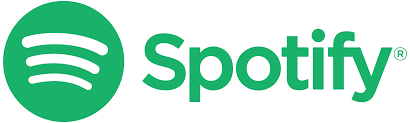

## To do
- Alterar o nome das colunas para a correta;
- Explicar as colunas;
- Explicar o codigo;
- Juntar os artistas que cantam a mesma musica;
- Trabalhar com os generos separados
- Coletar os dados de pelo menos 20 usuarios;
- Coletar mais dados de musicas;
- Completar os dados das musicas dos usuarios;
- Plotly
- knn

## Analise dos usuarios (faremos?)
- Ver quais usuarios ouvem musicas mais populares;
- Ver qual tipo de musica mais ouvido por usuario;
- Ver como um usuario se compara com outro;
- Ver se e possivel, talvez, sepah, recomendar musicas para os usuarios;

# Dataframe das Músicas

## Importando as bibliotecas

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Juntando os arquivos dos dataframes

In [2]:
diretorio = "./DataFrames/Musicas"
arquivos = [arquivo for arquivo in os.listdir(diretorio) if not arquivo.startswith('.')] # filtra essa lista, mantendo apenas os arquivos que não começam com "." (ponto).

df_musicas = pd.DataFrame()

for arquivo in arquivos:
    data_atual = pd.read_csv(diretorio+"/"+arquivo)
    df_musicas = pd.concat([df_musicas, data_atual])

In [3]:
df_musicas.head()

Unnamed: 0                track_id             track_name  artist_name  \
0           0  4uqJelb9THHmJ3OCohg4ZJ           Nosso Quadro  Ana Castela   
1           1  0SCMVUZ21uYYB8cc0ScfbV  Bombonzinho - Ao Vivo  Ana Castela   
2           2  0redQHBfejmPUhonR5ppGC              Duas Três  Ana Castela   
3           3  7sopDXkuzXtHt8AQpdBxmT            DONA DE MIM  Ana Castela   
4           4  5y7yYXNSsT89A27DQxbmUL               Covardia  Ana Castela   

                              artist_genres                    album_name  \
0  ['agronejo', 'funk rj', 'sertanejo pop']                  Nosso Quadro   
1  ['agronejo', 'funk rj', 'sertanejo pop']  Let's Bora, Vol. 2 (Ao Vivo)   
2  ['agronejo', 'funk rj', 'sertanejo pop']                     Duas Três   
3  ['agronejo', 'funk rj', 'sertanejo pop']                   DONA DE MIM   
4  ['agronejo', 'funk rj', 'sertanejo pop']                      Covardia   

                artist_id  popularity  duration_ms  explicit  ...  key  \
0  2CKOmarVWvWqkNWUatHCex          84       173698     False  ...    9   
1  2CKOmarVWvWqkNWUatHCex          79       154701     False  ...    1   
2  2CKOmarVWvWqkNWUatHCex          87       156942     False  ...    5   
3  2CKOmarVWvWqkNWUatHCex          84       145091     False  ...    1   
4  2CKOmarVWvWqkNWUatHCex          84       150863     False  ...    8   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -4.821     1       0.1950         0.338               0.0    0.3110   
1    -3.672     1       0.0548         0.300               0.0    0.9200   
2    -3.746     0       0.2010         0.574               0.0    0.6890   
3    -4.726     1       0.2340         0.437               0.0    0.1100   
4    -3.316     1       0.0522         0.215               0.0    0.0827   

   valence    tempo  time_signature  
0    0.602  160.018               4  
1    0.706  158.054               4  
2    0.721  159.918               4  
3    0.728  167.922               4  
4    0.745  149.969               4  

[5 rows x 22 columns]

## Análise exploratória de dados

### Informações sobre as colunas

In [4]:
df_musicas.shape

(15801, 22)

In [5]:
df_musicas.columns

Index(['Unnamed: 0', 'track_id', 'track_name', 'artist_name', 'artist_genres',
       'album_name', 'artist_id', 'popularity', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [6]:
df_musicas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15801 entries, 0 to 999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15801 non-null  int64  
 1   track_id          15801 non-null  object 
 2   track_name        15801 non-null  object 
 3   artist_name       15801 non-null  object 
 4   artist_genres     15801 non-null  object 
 5   album_name        15801 non-null  object 
 6   artist_id         15801 non-null  object 
 7   popularity        15801 non-null  int64  
 8   duration_ms       15801 non-null  int64  
 9   explicit          15801 non-null  bool   
 10  danceability      15801 non-null  float64
 11  energy            15801 non-null  float64
 12  key               15801 non-null  int64  
 13  loudness          15801 non-null  float64
 14  mode              15801 non-null  int64  
 15  speechiness       15801 non-null  float64
 16  acousticness      15801 non-null  float64


In [7]:
df_musicas.dtypes

Unnamed: 0            int64
track_id             object
track_name           object
artist_name          object
artist_genres        object
album_name           object
artist_id            object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [8]:
df_musicas.dtypes.value_counts()

float64    9
int64      6
object     6
bool       1
dtype: int64

### Análise estatísticas

In [9]:
df_musicas.describe()

Unnamed: 0    popularity   duration_ms  danceability        energy  \
count  15801.000000  15801.000000  1.580100e+04  15801.000000  15801.000000   
mean     337.764319     64.871274  2.122920e+05      0.648546      0.645806   
std      255.703048     14.054803  8.352651e+04      0.157492      0.190112   
min        0.000000      0.000000  3.200000e+04      0.000000      0.000019   
25%      128.000000     57.000000  1.651060e+05      0.550000      0.523000   
50%      290.000000     67.000000  1.982660e+05      0.662000      0.664000   
75%      467.000000     75.000000  2.366450e+05      0.763000      0.790000   
max      999.000000    100.000000  1.831455e+06      0.985000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  15801.000000  15801.000000  15801.000000  15801.000000  15801.000000   
mean       5.335865     -6.775177      0.592621      0.116497      0.303096   
std        3.607574      3.672338      0.491362      0.118637      0.270237   
min        0.000000    -39.627000      0.000000      0.000000      0.000000   
25%        2.000000     -8.156000      0.000000      0.038700      0.059100   
50%        5.000000     -6.117000      1.000000      0.060500      0.229000   
75%        9.000000     -4.536000      1.000000      0.150000      0.507000   
max       11.000000      3.064000      1.000000      0.945000      0.995000   

       instrumentalness      liveness       valence         tempo  \
count      15801.000000  15801.000000  15801.000000  15801.000000   
mean           0.037380      0.217052      0.541592    123.189771   
std            0.155213      0.200997      0.236072     28.104616   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.098000      0.362000    100.100000   
50%            0.000000      0.130000      0.553000    124.019000   
75%            0.000100      0.263000      0.730000    140.078000   
max            0.999000      0.993000      0.993000    220.099000   

       time_signature  
count    15801.000000  
mean         3.968673  
std          0.364700  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

### Verificando se existem valores nulos no dataframe

In [10]:
df_musicas.isnull().sum()

Unnamed: 0          0
track_id            0
track_name          0
artist_name         0
artist_genres       0
album_name          0
artist_id           0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

## Tratando o dataframe

### Excluindo a coluna "Unnamed: 0"

In [11]:
df_musicas = df_musicas.drop("Unnamed: 0", axis=1)
df_musicas.head()

track_id             track_name  artist_name  \
0  4uqJelb9THHmJ3OCohg4ZJ           Nosso Quadro  Ana Castela   
1  0SCMVUZ21uYYB8cc0ScfbV  Bombonzinho - Ao Vivo  Ana Castela   
2  0redQHBfejmPUhonR5ppGC              Duas Três  Ana Castela   
3  7sopDXkuzXtHt8AQpdBxmT            DONA DE MIM  Ana Castela   
4  5y7yYXNSsT89A27DQxbmUL               Covardia  Ana Castela   

                              artist_genres                    album_name  \
0  ['agronejo', 'funk rj', 'sertanejo pop']                  Nosso Quadro   
1  ['agronejo', 'funk rj', 'sertanejo pop']  Let's Bora, Vol. 2 (Ao Vivo)   
2  ['agronejo', 'funk rj', 'sertanejo pop']                     Duas Três   
3  ['agronejo', 'funk rj', 'sertanejo pop']                   DONA DE MIM   
4  ['agronejo', 'funk rj', 'sertanejo pop']                      Covardia   

                artist_id  popularity  duration_ms  explicit  danceability  \
0  2CKOmarVWvWqkNWUatHCex          84       173698     False         0.691   
1  2CKOmarVWvWqkNWUatHCex          79       154701     False         0.654   
2  2CKOmarVWvWqkNWUatHCex          87       156942     False         0.656   
3  2CKOmarVWvWqkNWUatHCex          84       145091     False         0.680   
4  2CKOmarVWvWqkNWUatHCex          84       150863     False         0.656   

   ...  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0  ...    9    -4.821     1       0.1950         0.338               0.0   
1  ...    1    -3.672     1       0.0548         0.300               0.0   
2  ...    5    -3.746     0       0.2010         0.574               0.0   
3  ...    1    -4.726     1       0.2340         0.437               0.0   
4  ...    8    -3.316     1       0.0522         0.215               0.0   

   liveness  valence    tempo  time_signature  
0    0.3110    0.602  160.018               4  
1    0.9200    0.706  158.054               4  
2    0.6890    0.721  159.918               4  
3    0.1100    0.728  167.922               4  
4    0.0827    0.745  149.969               4  

[5 rows x 21 columns]

### Verificando se existem linhas duplicadas no dataframe

In [12]:
df_musicas.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 15801, dtype: bool

In [13]:
df_musicas.duplicated().sum()

4110

In [14]:
df_musicas.loc[df_musicas.duplicated()]

track_id                           track_name  \
90   4hKLzFvNwHF6dPosGT30ed                         Novo Balanço   
91   3d1im1pw3WLuEty2k9XzTr                            Clickbait   
92   39xOREhViooEYFpmnKTdrl               Engana Dizendo Que Ama   
93   5ffDENIdtByAZxHpuuj9li                          Vida Chique   
94   7zKqmAHGY8zm2UA4wT5ant                 Perdoa Por Tudo Vida   
..                      ...                                  ...   
939  19DVNifOaTnuP0iq1kTqgW  Let's Stay Together - 2015 Remaster   
965  3MFFDRC4wTN9JNGtzXsZlN                       Love Her Madly   
967  67HxeUADW4H3ERfaPW59ma                    Love Me Two Times   
968  4BVE5tIIpYabZcYCbephNW                             Touch Me   
969  6DmfWj5kOa1fX8AwN9byOn                           L.A. Woman   

       artist_name                                      artist_genres  \
90   Supernova Ent                                ['trap brasileiro']   
91   Supernova Ent                                ['trap brasileiro']   
92   Supernova Ent                                ['trap brasileiro']   
93   Supernova Ent                                ['trap brasileiro']   
94   Supernova Ent                                ['trap brasileiro']   
..             ...                                                ...   
939    Tina Turner                                      ['soft rock']   
965      The Doors  ['acid rock', 'album rock', 'classic rock', 'h...   
967      The Doors  ['acid rock', 'album rock', 'classic rock', 'h...   
968      The Doors  ['acid rock', 'album rock', 'classic rock', 'h...   
969      The Doors  ['acid rock', 'album rock', 'classic rock', 'h...   

                                  album_name               artist_id  \
90                        Dos Prédios Deluxe  3prRKGJz16RRMRSIM97nHw   
91                        Dos Prédios Deluxe  3prRKGJz16RRMRSIM97nHw   
92                        Dos Prédios Deluxe  3prRKGJz16RRMRSIM97nHw   
93                               Dos Prédios  3prRKGJz16RRMRSIM97nHw   
94                               Dos Prédios  3prRKGJz16RRMRSIM97nHw   
..                                       ...                     ...   
939  Private Dancer (30th Anniversary Issue)  1zuJe6b1roixEKMOtyrEak   
965                               L.A. Woman  22WZ7M8sxp5THdruNY3gXt   
967                             Strange Days  22WZ7M8sxp5THdruNY3gXt   
968                          The Soft Parade  22WZ7M8sxp5THdruNY3gXt   
969                               L.A. Woman  22WZ7M8sxp5THdruNY3gXt   

     popularity  duration_ms  explicit  danceability  ...  key  loudness  \
90           85       140322      True         0.836  ...    3    -5.820   
91           76       161344      True         0.899  ...    0    -6.674   
92           82       188497      True         0.789  ...    6   -10.396   
93           81       210545      True         0.597  ...    4    -6.686   
94           77       160000      True         0.715  ...    1   -10.640   
..          ...          ...       ...           ...  ...  ...       ...   
939          70       316746     False         0.671  ...    8    -5.792   
965          70       198466     False         0.565  ...    4    -7.393   
967          68       195106     False         0.684  ...    9    -6.219   
968          68       190253     False         0.425  ...    1    -4.801   
969          67       471160     False         0.354  ...    2    -9.178   

     mode  speechiness  acousticness  instrumentalness  liveness  valence  \
90      0       0.0563        0.6690          0.000000    0.1340    0.650   
91      0       0.3200        0.3910          0.000000    0.1380    0.753   
92      0       0.3620        0.5420          0.000000    0.1450    0.532   
93      0       0.3890        0.5570          0.000000    0.2490    0.553   
94      0       0.4520        0.4390          0.000000    0.0848    0.662   
..    ...          ...           ...               ...       ...      ...   
939     

### Renomeando as colunas para português

In [15]:
df_musicas.columns

Index(['track_id', 'track_name', 'artist_name', 'artist_genres', 'album_name',
       'artist_id', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [16]:
df_musicas.rename(columns={'track_id': 'id_da_faixa',
                        'track_name': 'nome_da_faixa',
                        'artist_name': 'nome_do_artista',
                        'artist_genres': 'generos_do_artista',
                        'album_name': 'nome_do_album',
                        'artist_id': 'id_do_artista',
                        'popularity': 'popularidade',
                        'duration_ms': 'duracao_ms',
                        'explicit': 'explicita',
                        'danceability': 'dançabilidade',
                        'energy': 'energia',
                        'key': 'chave',
                        'loudness': 'volume',
                        'mode': 'modo',
                        'speechiness': 'fala',
                        'acousticness': 'acusticidade',
                        'instrumentalness': 'instrumentalidade',
                        'liveness': 'vivacidade',
                        'valence': 'valencia',
                        'tempo': 'tempo',
                        'time_signature': 'assinatura_tempo'}, inplace=True)

### Excluindo as linhas duplicadas

In [17]:
df_musicas.duplicated().sum()

4110

In [18]:
df_musicas.shape

(15801, 21)

In [19]:
df_musicas = df_musicas.drop_duplicates(keep='last')
df_musicas.shape

(11691, 21)

### Criação de uma nova coluna para a duração das músicas em minutos

In [20]:
df_musicas['duracao_ms'].dtype

dtype('int64')

In [21]:
df_musicas['duracao_min'] = pd.to_datetime(df_musicas['duracao_ms'], unit='ms').dt.strftime('%M:%S')
df_musicas.head()

id_da_faixa          nome_da_faixa nome_do_artista  \
0  4uqJelb9THHmJ3OCohg4ZJ           Nosso Quadro     Ana Castela   
1  0SCMVUZ21uYYB8cc0ScfbV  Bombonzinho - Ao Vivo     Ana Castela   
2  0redQHBfejmPUhonR5ppGC              Duas Três     Ana Castela   
3  7sopDXkuzXtHt8AQpdBxmT            DONA DE MIM     Ana Castela   
4  5y7yYXNSsT89A27DQxbmUL               Covardia     Ana Castela   

                         generos_do_artista                 nome_do_album  \
0  ['agronejo', 'funk rj', 'sertanejo pop']                  Nosso Quadro   
1  ['agronejo', 'funk rj', 'sertanejo pop']  Let's Bora, Vol. 2 (Ao Vivo)   
2  ['agronejo', 'funk rj', 'sertanejo pop']                     Duas Três   
3  ['agronejo', 'funk rj', 'sertanejo pop']                   DONA DE MIM   
4  ['agronejo', 'funk rj', 'sertanejo pop']                      Covardia   

            id_do_artista  popularidade  duracao_ms  explicita  dançabilidade  \
0  2CKOmarVWvWqkNWUatHCex            84      173698      False          0.691   
1  2CKOmarVWvWqkNWUatHCex            79      154701      False          0.654   
2  2CKOmarVWvWqkNWUatHCex            87      156942      False          0.656   
3  2CKOmarVWvWqkNWUatHCex            84      145091      False          0.680   
4  2CKOmarVWvWqkNWUatHCex            84      150863      False          0.656   

   ...  volume  modo    fala  acusticidade  instrumentalidade  vivacidade  \
0  ...  -4.821     1  0.1950         0.338                0.0      0.3110   
1  ...  -3.672     1  0.0548         0.300                0.0      0.9200   
2  ...  -3.746     0  0.2010         0.574                0.0      0.6890   
3  ...  -4.726     1  0.2340         0.437                0.0      0.1100   
4  ...  -3.316     1  0.0522         0.215                0.0      0.0827   

   valencia    tempo  assinatura_tempo  duracao_min  
0     0.602  160.018                 4        02:53  
1     0.706  158.054                 4        02:34  
2     0.721  159.918                 4        02:36  
3     0.728  167.922                 4        02:25  
4     0.745  149.969                 4        02:30  

[5 rows x 22 columns]

## Primeiras análises

In [22]:
df_musicas['id_da_faixa'].value_counts() > 1

7lzfMZak2HjNPXXSxksjPB     True
4L9XGAYgA3Q04qecyjV7iB     True
7qoIhutxU269Zqo9PG5IOj     True
2xebCnKCjYWBhJ4Ai8hO5E     True
2r4zhMrN1cQEXNWNG2SkXW     True
                          ...  
0Dkibk70FDp6t7eOZNemNQ    False
4hQeiQovsUpgox09PPXw91    False
3weNRklVDqb4Rr5MhKBR3D    False
1BncfTJAWxrsxyT9culBrj    False
4W302qkLfaNUiqkkV6E6HT    False
Name: id_da_faixa, Length: 9885, dtype: bool

In [23]:
(df_musicas['id_da_faixa'].value_counts() > 1).sum()

1446

In [24]:
df_musicas.loc[df_musicas['id_da_faixa'] == '7lzfMZak2HjNPXXSxksjPB']

id_da_faixa                  nome_da_faixa nome_do_artista  \
340  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva   Jorge Ben Jor   
371  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva          Lenine   
273  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva         Alcione   
492  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva          Frejat   
461  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva   Beth Carvalho   
398  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva      Maria Rita   
184  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva        Péricles   
360  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva          Djavan   
208  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva       Mumuzinho   
380  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva         Emicida   
0    7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva  Zeca Pagodinho   
335  7lzfMZak2HjNPXXSxksjPB  Camarão Que Dorme a Onda Leva    Arlindo Cruz   

                                    generos_do_artista  \
340  ['bossa nova', 'manguebeat', 'mpb', 'samba', '...   
371  ['bossa nova', 'brazilian rock', 'manguebeat',...   
273  ['mpb', 'musica maranhense', 'pagode', 'pagode...   
492                ['mpb', 'rock nacional brasileiro']   
461  ['bossa nova', 'mpb', 'pagode', 'partido alto'...   
398           ['bossa nova', 'mpb', 'pagode', 'samba']   
184                          ['pagode', 'pagode novo']   
360                         ['mpb', 'musica alagoana']   
208                          ['pagode', 'pagode novo']   
380  ['afrofuturismo brasileiro', 'brazilian hip ho...   
0    ['mpb', 'pagode', 'partido alto', 'samba', 'sa...   
335          ['mpb', 'pagode', 'pagode novo', 'samba']   

                        nome_do_album           id_do_artista  popularidade  \
340  Sambabook Zeca Pagodinho, Vol. 2  5JYtpnUKxAzXfHEYpOeeit            64   
371  Sambabook Zeca Pagodinho, Vol. 2  4YLBdrR3DVSMncm785NH6C            64   
273  Sambabook Zeca Pagodinho, Vol. 2  0hPar6ePAELiu9rYMdvMEo            64   
492  Sambabook Zeca Pagodinho, Vol. 2  3WVjDclrbHsxjxhiOqHdnw            64   
461  Sambabook Zeca Pagodinho, Vol. 2  56TkPi7rpmU8jTpkcK7FY3            64   
398  Sambabook Zeca Pagodinho, Vol. 2  1C8UBSZs5rOPfxuxTMS6OI            64   
184  Sambabook Zeca Pagodinho, Vol. 2  6gEzJZrbm0F4ihvE9iXR9z            64   
360  Sambabook Zeca Pagodinho, Vol. 2  5rrmaoBXZ7Jcs4Qb77j0YA            64   
208  Sambabook Zeca Pagodinho, Vol. 2  34dfPo3Zi55yM6oV46q4y7            64   
380  Sambabook Zeca Pagodinho, Vol. 2  2d9LRvQJnAXRijqIJDDs2K            64   
0    Sambabook Zeca Pagodinho, Vol. 2  3qZ2n5keOAat1SoF6bHwmb            64   
335  Sambabook Zeca Pagodinho, Vol. 2  096an3uS6ZaK2XySae6SqP            64   

     duracao_ms  explicita  dançabilidade  ...  volume  modo    fala  \
340      168948      False          0.723  ...  -6.694     1  0.0802   
371      168948      False          0.723  ...  -6.694     1  0.0802   
273      168948      False          0.723  ...  -6.694     1  0.0802   
492      168948      False          0.723  ...  -6.694     1  0.0802   
461      168948      False          0.723  ...  -6.694     1  0.0802   
398      168948      False          0.723  ...  -6.694     1  0.0802   
184      168948      False          0.723  ...  -6.694     1  0.0802   
360      168948      False          0.723  ...  -6.694     1  0.0802   
208      168948      False          0.723  ...  -6.694     1  0.0802   
380      168948      False          0.723  ...  -6.694     1  0.0802   
0        168948      False          0.723  ...  -6.694     1  0.0802   
335      168948      False          0.723  ...  -6.694     1  0.0802   

     acusticidade  instrumentalidade  vivacidade  valencia    tempo  \
340         0.313                0.0       0.052     0.739  106.359   
371         0.313                0.0       0.052     0.739  106.359   
273         0.313                0.0       0.052     0.739  106.359 

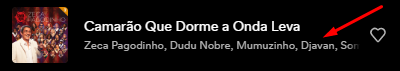

In [25]:
conta_track_id = df_musicas['id_da_faixa'].unique()
conta_track_id.size

9885

### Verificando os valores de algumas colunas

#### Coluna popularidade

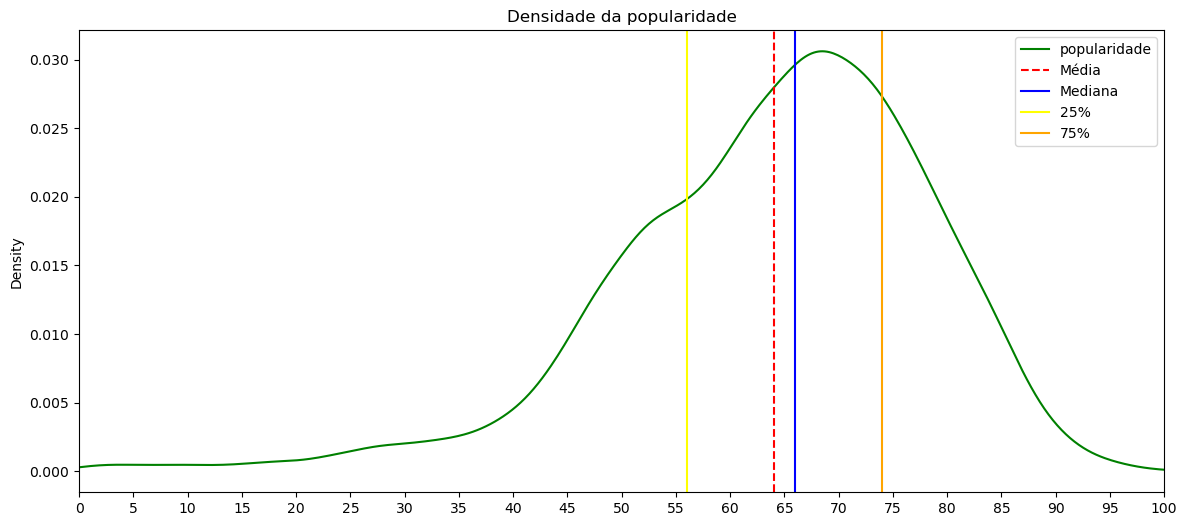

In [26]:
df_musicas['popularidade'].plot(kind='density', figsize=(14, 6), c='green')

# Adicionando linha na média
median_popularidade = df_musicas['popularidade'].median()
mean_popularidade = df_musicas['popularidade'].mean()
q1 = df_musicas['popularidade'].quantile(0.25)
q3 = df_musicas['popularidade'].quantile(0.75)

plt.axvline(mean_popularidade, color='red', linestyle='--', label='Média')
plt.axvline(median_popularidade, color='blue', label='Mediana')
plt.axvline(q1, color='yellow', label='25%')
plt.axvline(q3, color='orange', label='75%')
plt.xlim(0, 100)  # Definindo os limites do eixo x
plt.legend()  # Mostrar a legenda
plt.title("Densidade da popularidade")
plt.xticks(np.arange(0, 101, 5))
plt.show()

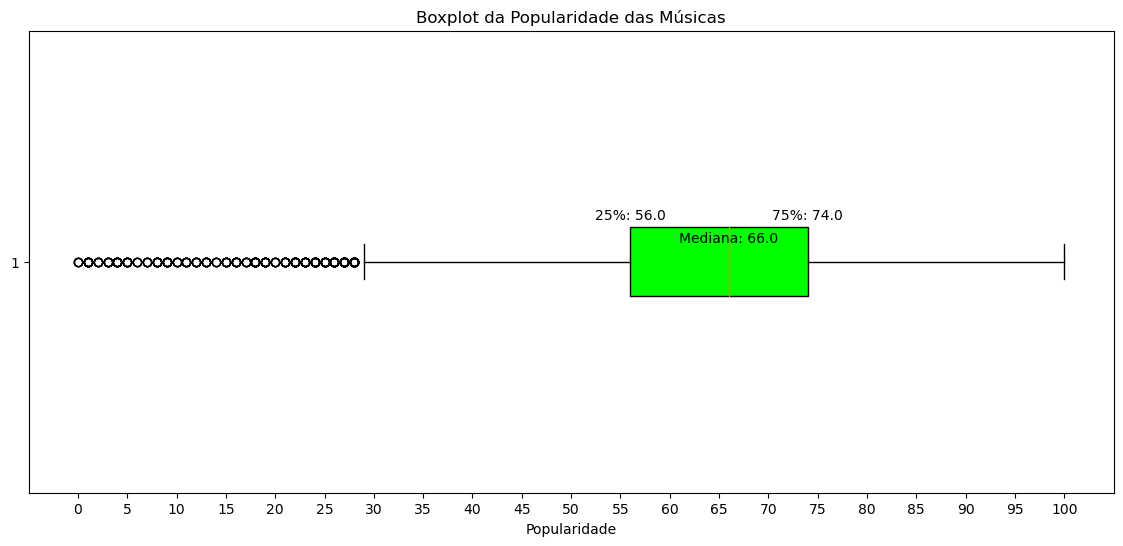

In [27]:
# Configurar tamanho da figura
fig, ax = plt.subplots(figsize=(14, 6))

# Configurar cor verde
box_color = '#00FF00'  # Verde

# Plotar o boxplot
boxplot = plt.boxplot(df_musicas['popularidade'], vert=False, patch_artist=True)

# Personalizar a aparência
for box in boxplot['boxes']:
    box.set(facecolor=box_color)

# Adicionar texto com informações estatísticas
mediana = df_musicas['popularidade'].median()
q1 = df_musicas['popularidade'].quantile(0.25)
q3 = df_musicas['popularidade'].quantile(0.75)

plt.text(mediana, 1.05, f'Mediana: {mediana}', ha='center', va='center')
plt.text(q1, 1.1, f'25%: {q1}', ha='center', va='center')
plt.text(q3, 1.1, f'75%: {q3}', ha='center', va='center')

# Configurar os rótulos do eixo
ax.set_xlabel('Popularidade')
ax.set_ylabel('')

# Configurar o título do gráfico
ax.set_title('Boxplot da Popularidade das Músicas')
plt.xticks(np.arange(0, 101, 5))
# Exibir o gráfico
plt.show()

In [28]:
df_musicas['popularidade'].describe()

count    11691.000000
mean        64.085964
std         14.297106
min          0.000000
25%         56.000000
50%         66.000000
75%         74.000000
max        100.000000
Name: popularidade, dtype: float64

#### Coluna assinatura_tempo

In [29]:
df_musicas['assinatura_tempo'].value_counts()

4    10513
3      671
5      464
1       40
0        3
Name: assinatura_tempo, dtype: int64

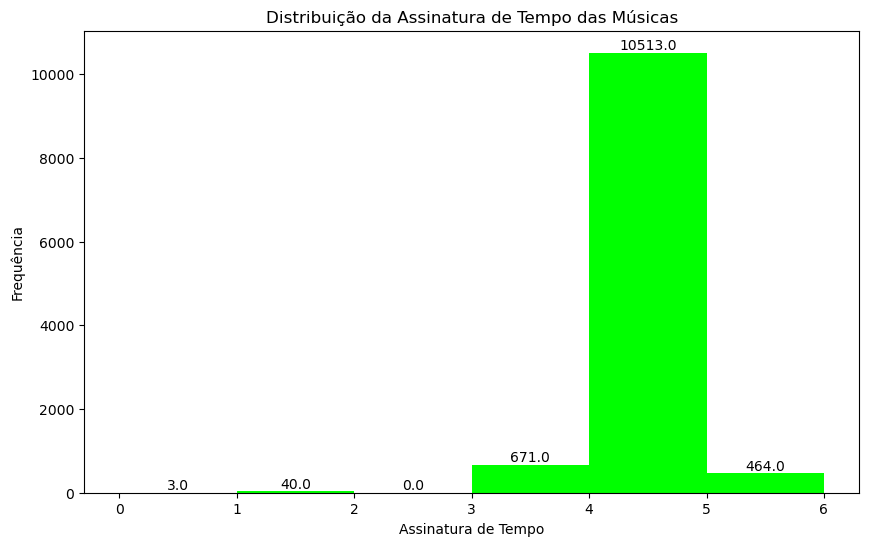

In [30]:
# Configurar tamanho da figura
fig, ax = plt.subplots(figsize=(14, 6))

# Configurar cores
hist_color = '#00FF00'

# Plotar o histograma considerando apenas valores inteiros
df_musicas['assinatura_tempo'].plot(kind='hist', figsize=(10, 6), color=hist_color, bins=range(int(df_musicas['assinatura_tempo'].min()), int(df_musicas['assinatura_tempo'].max()) + 2))

# Personalizar a aparência
plt.title('Distribuição da Assinatura de Tempo das Músicas')
plt.xlabel('Assinatura de Tempo')
plt.ylabel('Frequência')

# Adicionar valores numéricos acima das barras
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(height),
            ha='center', va='bottom')

# Exibir o gráfico
plt.show()

#### Coluna modo

In [31]:
df_musicas['modo'].value_counts()

1    6848
0    4843
Name: modo, dtype: int64

<Axes: ylabel='modo'>

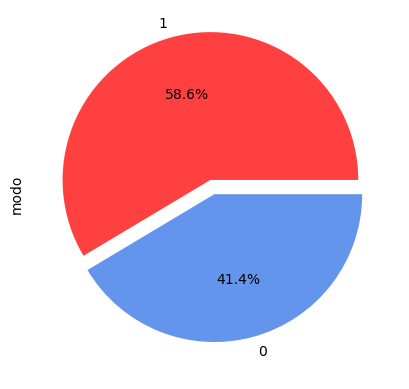

In [32]:
explode = (0.1, 0)  # Define o afastamento das fatias
cores = ['#FF4040', '#6495ED'] # Define as cores das fatias

df_musicas['modo'].value_counts().plot.pie(autopct='%1.1f%%', explode=explode, colors=cores)

#### Coluna explicita

In [33]:
df_musicas['explicita'].value_counts()

False    7869
True     3822
Name: explicita, dtype: int64

<Axes: ylabel='explicita'>

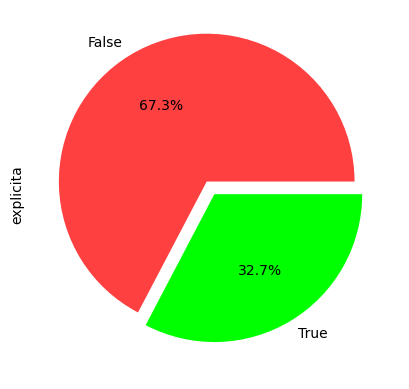

In [34]:
explode = (0.1, 0)  # Define o afastamento das fatias
cores = ['#FF4040', '#00FF00']  # Define as cores das fatias

df_musicas['explicita'].value_counts().plot.pie(autopct='%1.1f%%', explode=explode, colors=cores)

#### Coluna chave

In [35]:
df_musicas['chave'].value_counts()

1     1333
0     1208
7     1167
11    1112
9     1105
2     1098
5      949
4      912
6      867
8      788
10     752
3      400
Name: chave, dtype: int64

<Axes: ylabel='chave'>

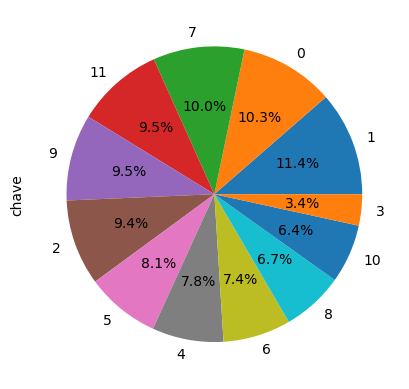

In [36]:
df_musicas['chave'].value_counts().plot.pie(autopct='%1.1f%%')

## Classificando os dados

### Músicas por Artistas

In [37]:
df_tracksbyArtists = df_musicas[['id_do_artista','nome_do_artista']].value_counts()

print(df_musicas['id_do_artista'].unique().size, 'artistas no total.')

print(df_tracksbyArtists.mean())
display(df_tracksbyArtists)

1104 artistas no total.
10.589673913043478


id_do_artista           nome_do_artista      
16oZKvXb6WkQlVAjwo2Wbg  The Lumineers            30
7jy3rLJdDQY21OgRLCZ9sD  Foo Fighters             20
2ye2Wgw4gimLv2eAKyk1NB  Metallica                20
2FXC3k01G6Gw61bmprjgqS  Hozier                   20
6jJ0s89eD6GaHleKKya26X  Katy Perry               20
                                                 ..
03evdtQP9vcuqdDU6hOluN  Nick Nash                 3
6DsMACWhJ5AgWLkZA2f5BV  JHXW                      3
2xzyIzdjfeXX6FIQtlAAyw  ARIZONATEARS              3
7EBPbFTg2MYu0xvJwSUGOM  João Bosco & Vinícius     2
2Pel0jsoeCdLst2bxzykQJ  dvrkness13                2
Length: 1104, dtype: int64

### Músicas com a maior popularidade

In [38]:
df_toptracks = df_musicas.sort_values('popularidade',ascending = False).head(100)

df_toptracks_view = df_toptracks[['id_da_faixa','nome_da_faixa', 'nome_do_artista', 'popularidade']].copy()
df_toptracks_view.reset_index()[['id_da_faixa','nome_da_faixa', 'nome_do_artista','popularidade']]

id_da_faixa                                      nome_da_faixa  \
0   6pD0ufEQq0xdHSsRbg9LBK                                          un x100to   
1   2UW7JaomAMuX9pZrjVpHAU                                    La Bebe - Remix   
2   7ro0hRteUMfnOioTFI5TG1                                     WHERE SHE GOES   
3   1odExI7RdWc4BT515LTAwj                                           Daylight   
4   7FbrGaHYVDmfr7KoLIZnQ7                                  Cupid - Twin Ver.   
..                     ...                                                ...   
95  0vjeOZ3Ft5jvAi9SBFJm1j  Superhero (Heroes & Villains) [with Future & C...   
96  0u2P5u6lvoDfwTYjAADbn4                               lovely (with Khalid)   
97  5xP9lQYA8YQmQh6BOxcAnR  Popular (with Playboi Carti & Madonna) - The I...   
98  0pqnGHJpmpxLKifKRmU6WP                                           Believer   
99  4FAKtPVycI4DxoOHC01YqD                                         Yandel 150   

    nome_do_artista  popularidade  
0         Bad Bunny           100  
1        Peso Pluma            99  
2         Bad Bunny            99  
3     David Kushner            98  
4       FIFTY FIFTY            98  
..              ...           ...  
95           Future            90  
96    Billie Eilish            90  
97       The Weeknd            90  
98  Imagine Dragons            90  
99             Feid            90  

[100 rows x 4 columns]

### Artistas com a maior popularidade

In [39]:
# Assuming your dataframe is named 'df' with columns 'artist' and 'popularity'
df_grouped_artist = df_musicas.groupby(['id_do_artista', 'nome_do_artista'])['popularidade'].sum().reset_index()

# Sort the dataframe based on the sum of popularity in descending order
df_artist_sorted = df_grouped_artist.sort_values(by='popularidade', ascending=False)

# Display the most popular artists
most_popular_artists = df_artist_sorted[['id_do_artista', 'nome_do_artista']].reset_index()[['id_do_artista', 'nome_do_artista']]
most_popular_artists.head(100)

id_do_artista nome_do_artista
0   16oZKvXb6WkQlVAjwo2Wbg   The Lumineers
1   04gDigrS5kc9YWfZHwBETP        Maroon 5
2   6jJ0s89eD6GaHleKKya26X      Katy Perry
3   6LuN9FCkKOj5PcnpouEgny          Khalid
4   1uNFoZAHBGtllmzznpCI3s   Justin Bieber
..                     ...             ...
95  2LRoIwlKmHjgvigdNGBHNo            Feid
96  06HL4z0CvFAxyc27GXpf02    Taylor Swift
97  3TVXtAsR1Inumwj472S9r4           Drake
98  23fqKkggKUBHNkbKtXEls4            Kygo
99  0QHgL1lAIqAw0HtD7YldmP       DJ Khaled

[100 rows x 2 columns]

### Gêneros mais populares (baseado no genero dos artistas)

In [40]:
df_grouped_genres = df_musicas.groupby('generos_do_artista')['popularidade'].sum().reset_index()

# Sort the dataframe based on the sum of popularity in descending order
df_genres_sorted = df_grouped_genres.sort_values(by='popularidade', ascending=False)

# Display the most popular artists
most_popular_genres = df_genres_sorted[['generos_do_artista', 'popularidade']].reset_index()[['generos_do_artista', 'popularidade']]

most_popular_genres.head(100)

generos_do_artista  popularidade
0                                                  []         38406
1                                 ['trap brasileiro']         21233
2                                             ['pop']         12871
3                                ['brazilian gospel']         10520
4                                ['dance pop', 'pop']          8927
..                                                ...           ...
95                     ['bedroom pop', 'bedroom r&b']          1375
96  ['new wave', 'permanent wave', 'rock', 'uk pos...          1374
97  ['alternative metal', 'nu metal', 'post-grunge...          1371
98  ['baroque pop', 'modern rock', 'neo mellow', '...          1370
99   ['alternative metal', 'nu metal', 'post-grunge']          1368

[100 rows x 2 columns]

### Músicas com as maiores durações

In [41]:
df_longestTracks = df_musicas[["nome_da_faixa","nome_do_artista", "duracao_min", "duracao_ms"]].sort_values(by="duracao_min",ascending=False)[:20]

df_longestTracks = df_longestTracks.reset_index()[['nome_da_faixa','nome_do_artista', 'duracao_min', 'duracao_ms']]
df_longestTracks = df_longestTracks.drop_duplicates(keep='last')
df_longestTracks

nome_da_faixa        nome_do_artista  \
0                          Bloco Do Polly 2.0 Hitmado            Oh Polêmico   
1                            Tu És o Centro (Ao Vivo)            Frei Gilson   
2                           Poetas no Topo 3.3, Pt. 1          Bob do Contra   
3                           Poetas no Topo 3.3, Pt. 1                  Dk 47   
4   Chato Pa Carai / Recaída / Vai Me Dando Corda ...               Vou Zuar   
5                                Seu Amor Me Persegue                   AMÉM   
6                             Preciso de Ti - Ao Vivo        Diante do Trono   
7                                    Me Ama - Ao Vivo        Diante do Trono   
9               Shine On You Crazy Diamond (Pts. 1-5)             Pink Floyd   
10                                     Bloco Do Polly            Oh Polêmico   
11                                  Love Acústico 2.0           Belle Kaffer   
12                                           Mugiwara                    Sid   
13                        Hit do Ano - O Peso da Luta         MC Leozinho ZS   
14                        Hit do Ano - O Peso da Luta               MC Marks   
15                        Hit do Ano - O Peso da Luta  MC Neguinho do Kaxeta   
16                        Hit do Ano - O Peso da Luta            Mc Kelvinho   
17                        Hit do Ano - O Peso da Luta      Mc Vitão Do Savoy   
18                         Eu Te Levantarei (Ao Vivo)            Frei Gilson   
19               Poesia Acústica #5: Teu Popô - Remix          Luccas Carlos   

   duracao_min  duracao_ms  
0        30:31     1831455  
1        22:37     1357451  
2        19:07     1147406  
3        19:07     1147406  
4        18:05     1085565  
5        17:15     1035895  
6        15:19      919733  
7        14:35      875866  
9        13:31      811077  
10       13:07      787725  
11       13:06      786358  
12       12:59      779404  
13       12:24      744727  
14       12:24      744727  
15       12:24      744727  
16       12:24      744727  
17       12:24      744727  
18       12:23      743240  
19       12:17      737704

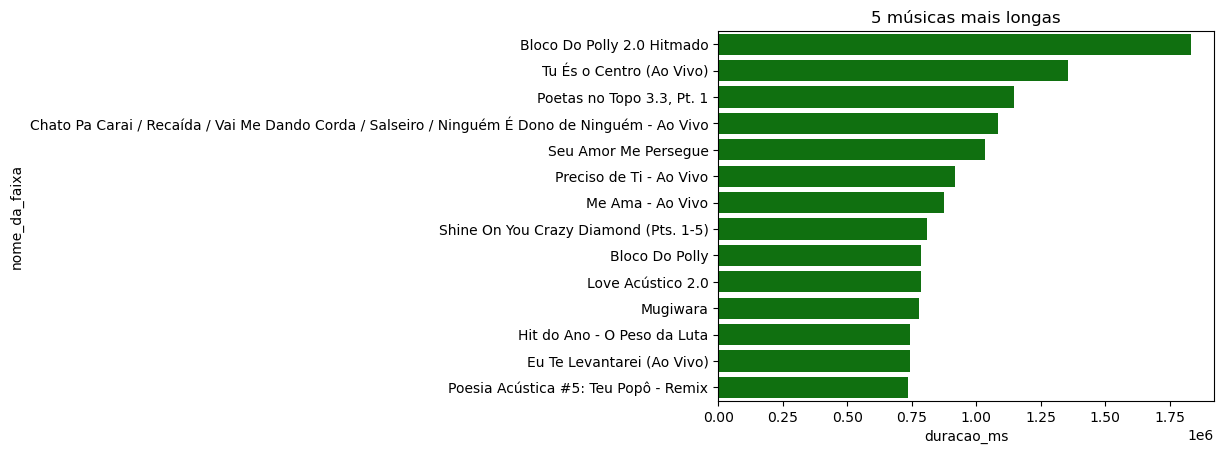

In [42]:
sns.barplot(x="duracao_ms", y="nome_da_faixa", data= df_longestTracks, color = 'green')
plt.title("5 músicas mais longas")
plt.show()

### Músicas com as menores durações

In [43]:
df_shortTracks = df_musicas[['nome_da_faixa','nome_do_artista', 'duracao_min', 'duracao_ms']].sort_values(by="duracao_min",ascending=True)[:20]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa','nome_do_artista', 'duracao_min', 'duracao_ms']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa    nome_do_artista  \
0                             Soothing Baby Sleep  Sleeping Tortoise   
1                      Bedtime White Noise Melody  Sleeping Tortoise   
2                   White Noise Baby Sleep Melody  Sleeping Tortoise   
3                         Gentle Piano Baby Sleep  Sleeping Tortoise   
4                         White Noise Calm Melody  Sleeping Tortoise   
5                              Calming Baby Sleep  Sleeping Tortoise   
6                             Peaceful Baby Sleep  Sleeping Tortoise   
7                  Calming White Noise Baby Sleep  Sleeping Tortoise   
8                        White Noise Piano Melody  Sleeping Tortoise   
9                      Relaxing Baby Sleep Melody  Sleeping Tortoise   
10                   Introduction to Sleep Babies          Nana Bebê   
11                Little Stars Shining in the Sky          Nana Bebê   
12  Brilha Brilha Estrelinha (Piano Instrumental)          Nana Bebê   
13                  The Peace That the Soul Needs          Nana Bebê   
14                              Clearing the Mind          Nana Bebê   
15                            Intro Brasileirinha          Puterrier   
16                        NO SECRET (feat. Drake)          DJ Khaled   
17                                          sans.           Toby Fox   
18         Sobre O Amor E Seu Trabalho Silencioso                Céu   
19                                    Fallen Down           Toby Fox   

   duracao_min  duracao_ms  
0        00:32       32000  
1        00:32       32000  
2        00:32       32000  
3        00:32       32000  
4        00:32       32000  
5        00:32       32000  
6        00:32       32000  
7        00:32       32000  
8        00:32       32000  
9        00:32       32000  
10       00:38       38571  
11       00:40       40928  
12       00:43       43889  
13       00:44       44785  
14       00:47       47571  
15       00:47       47647  
16       00:47       47354  
17       00:50       50624  
18       00:56       56105  
19       00:57       57818

### Músicas com a maior energia

In [44]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","energia", "volume"]].sort_values(by="energia",ascending=False)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'energia', 'volume']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa     nome_do_artista  \
0  Barulho de Chuva para Dormir Profundamente, Pt...    Barulho De Chuva   
1                      The Rain Dances on a Tin Roof  Medicina Relaxante   
2                 É o Antares Melhor Baile da Cidade         MC Flavinho   
3    Eu Sou a Mc Pipokinha - Tenho Pircing na Xereca        MC Pipokinha   
4    Eu Sou a Mc Pipokinha - Tenho Pircing na Xereca               MC MN   

   energia  volume  
0    1.000 -23.480  
1    0.999 -22.224  
2    0.998  -1.009  
3    0.997   1.218  
4    0.997   1.218

In [45]:
import IPython as ip

ip.display.Audio("antares.mp3")

![Cat Shakira Dance](https://media.giphy.com/media/blSTtZehjAZ8I/giphy.gif)

### Músicas com a menor energia

In [46]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","energia", "volume"]].sort_values(by="energia",ascending=True)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'energia', 'volume']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa     nome_do_artista   energia  volume
0                     Ruido Branco  Medicina Relaxante  0.000019  -9.954
1                Ruido Branco Bebe  Medicina Relaxante  0.000019  -9.879
2                Clearing the Mind           Nana Bebê  0.000690 -18.860
3  Little Stars Shining in the Sky           Nana Bebê  0.002150 -18.833
4                         Luminous    Ludovico Einaudi  0.002290 -34.977

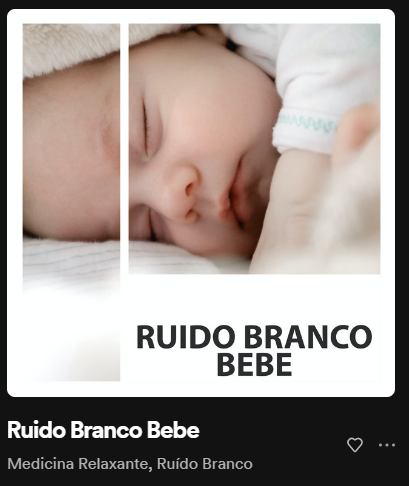

### Músicas mais dançaveis

In [47]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","dançabilidade"]].sort_values(by="dançabilidade",ascending=False)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'dançabilidade']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa nome_do_artista  dançabilidade
0                           Botadinha Saliente    MC Rogerinho          0.985
1                                      Red Dot       Yunk Vino          0.982
2                                      Red Dot     Caio Passos          0.982
3                                      Red Dot      Labbel Rec          0.982
4  Que Se Foda a Porra Toda (feat. Mc Mr. Bim)           Dj Tk          0.981

### Músicas menos dançaveis

In [48]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","dançabilidade"]].sort_values(by="dançabilidade",ascending=True)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'dançabilidade']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa          nome_do_artista  \
0                                  Ruido Branco Bebe       Medicina Relaxante   
1                                       Ruido Branco       Medicina Relaxante   
2  Requiem in D Minor, K. 626: Sequence: VI. Lacr...  Wolfgang Amadeus Mozart   
3                                        last breath                 Øneheart   
4                                Peaceful Baby Sleep        Sleeping Tortoise   

   dançabilidade  
0         0.0000  
1         0.0000  
2         0.0690  
3         0.0742  
4         0.0745

### Músicas com mais fala

In [49]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","fala"]].sort_values(by="fala",ascending=False)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'fala']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa     nome_do_artista   fala
0          Tá Possuida Cadela    Dj LK da Escócia  0.945
1                   Nômade IV          Jean Tassy  0.930
2                   Nômade IV       Yago Oproprio  0.930
3  Pede pra Botar Que Eu Boto  DJ Ws da Igrejinha  0.902
4           De Treta Em Treta             MC Caja  0.899

### Músicas com menos fala

In [50]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","fala"]].sort_values(by="fala",ascending=True)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'fala']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa                  nome_do_artista    fala
0              Ruido Branco               Medicina Relaxante  0.0000
1         Ruido Branco Bebe               Medicina Relaxante  0.0000
2                Folha Seca                    Amado Batista  0.0230
3                   Perfect                       Ed Sheeran  0.0232
4  Into The Great Wide Open  Tom Petty and the Heartbreakers  0.0235

### Músicas com maior acusticidade

In [51]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","acusticidade"]].sort_values(by="acusticidade",ascending=False)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'acusticidade']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa          nome_do_artista  \
0                                          Boa Noite               Mundo Bita   
1      Brilha Brilha Estrelinha (Piano Instrumental)                Nana Bebê   
2                                  Clearing the Mind                Nana Bebê   
3  Piano Sonata No. 12 in F Major, K. 332: II. Ad...  Wolfgang Amadeus Mozart   
4                                        Chuva Chove               Mundo Bita   

   acusticidade  
0         0.995  
1         0.995  
2         0.995  
3         0.995  
4         0.995

### Músicas com menor acusticidade

In [52]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","acusticidade"]].sort_values(by="acusticidade",ascending=True)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'acusticidade']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa      nome_do_artista  acusticidade
0                    Ruido Branco   Medicina Relaxante      0.000000
1               Ruido Branco Bebe   Medicina Relaxante      0.000000
2  Sex Type Thing - 2017 Remaster  Stone Temple Pilots      0.000001
3                            Soft  Motionless In White      0.000005
4                       Under You         Foo Fighters      0.000005

### Músicas com maior instrumentalidade

In [53]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","instrumentalidade"]].sort_values(by="instrumentalidade",ascending=False)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'instrumentalidade']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa                   nome_do_artista  \
0            Bedtime White Noise Melody                 Sleeping Tortoise   
1           Hair Dryer [Non-Stationary]                Medicina Relaxante   
2  528 Hz Bring Positive Transformation  Solfeggio Healing Frequencies MT   
3                   Soothing Baby Sleep                 Sleeping Tortoise   
4             The Gentlest Thunderstorm                Medicina Relaxante   

   instrumentalidade  
0              0.999  
1              0.994  
2              0.992  
3              0.992  
4              0.992

### Músicas com menor instrumentalidade

In [54]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","instrumentalidade"]].sort_values(by="instrumentalidade",ascending=True)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'instrumentalidade']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa nome_do_artista  \
0                                 Nosso Quadro     Ana Castela   
1                            Virando o Olhinho    Kadu Martins   
2                                     Onlyfans    Kadu Martins   
3                              Halls na Língua    Kadu Martins   
4  Novinha do Onlyfans (Tchan Ran Tchan Tchan)    Kadu Martins   

   instrumentalidade  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

### Músicas com maior vivacidade

In [55]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","vivacidade"]].sort_values(by="vivacidade",ascending=False)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'vivacidade']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa nome_do_artista  \
0                    Lanterna dos Afogados - Ao Vivo      Maria Gadú   
1  Quando Fui Chuva / Fim de Tarde / Palpite - Ao...        Marvvila   
2                                100 Likes - Ao Vivo            Belo   
3                                Sobrenome - Ao vivo         Vitinho   
4                                       Agora Perdeu       Bom Gosto   

   vivacidade  
0       0.993  
1       0.990  
2       0.989  
3       0.988  
4       0.988

### Músicas com menor vivacidade

In [56]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","vivacidade"]].sort_values(by="vivacidade",ascending=True)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'vivacidade']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa     nome_do_artista  vivacidade
0         Ruido Branco  Medicina Relaxante      0.0000
1    Ruido Branco Bebe  Medicina Relaxante      0.0000
2        Ants Marching  Dave Matthews Band      0.0157
3          Bonetrousle            Toby Fox      0.0200
4  Dig Dig Dig (Hempa)         Planet Hemp      0.0209

### Músicas com maior valência

In [57]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","valencia"]].sort_values(by="valencia",ascending=False)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'valencia']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa      nome_do_artista  valencia
0          Spider Dance             Toby Fox     0.993
1  What a Fool Believes  The Doobie Brothers     0.985
2     Mordidinha Safada            Mc Daniel     0.981
3                   Ryd           Steve Lacy     0.980
4      Parabéns da Xuxa                 Xuxa     0.980

### Músicas com menor valência

In [58]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","valencia"]].sort_values(by="valencia",ascending=True)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'valencia']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa     nome_do_artista  valencia
0       Gentle Piano Baby Sleep   Sleeping Tortoise       0.0
1      White Noise Piano Melody   Sleeping Tortoise       0.0
2                  Ruido Branco  Medicina Relaxante       0.0
3             Ruido Branco Bebe  Medicina Relaxante       0.0
4  Introduction to Sleep Babies           Nana Bebê       0.0

### Músicas com maior tempo

In [59]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","tempo"]].sort_values(by="tempo",ascending=False)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'tempo']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa nome_do_artista    tempo
0                     Mama Cry       YNW Melly  220.099
1               Queimando Tudo     Planet Hemp  215.126
2           snowfall (Sped Up)        Øneheart  213.503
3  Lovin', Touchin', Squeezin'         Journey  211.270
4  Hell N Back - A COLORS SHOW           Bakar  209.823

### Músicas com menor tempo

In [60]:
df_shortTracks = df_musicas[["nome_da_faixa","nome_do_artista","tempo"]].sort_values(by="tempo",ascending=True)[:5]

df_shortTracks = df_shortTracks.reset_index()[['nome_da_faixa', 'nome_do_artista', 'tempo']]
df_shortTracks = df_shortTracks.drop_duplicates(keep='last')
df_shortTracks

nome_da_faixa     nome_do_artista   tempo
0         Ruido Branco Bebe  Medicina Relaxante   0.000
1              Ruido Branco  Medicina Relaxante   0.000
2  Brilha Brilha Estrelinha  Galinha Pintadinha  41.293
3          Superficial Love             Ruth B.  43.509
4      Cheguei No Anonimato               MC PH  45.109

## Correlação dos dados

Verificar a correlação de dados na análise exploratória é importante porque ajuda a entender a relação entre as variáveis em um conjunto de dados. A correlação é uma medida estatística que indica a força e a direção da relação entre duas variáveis.

Ao examinar a correlação, podemos determinar se as variáveis estão positivamente correlacionadas (ou seja, quando uma aumenta, a outra também aumenta), negativamente correlacionadas (quando uma aumenta, a outra diminui) ou não correlacionadas (quando não há relação aparente entre as variáveis).

Além disso, a correlação também ajuda a identificar possíveis problemas com o conjunto de dados, como a presença de outliers ou variáveis altamente correlacionadas, o que pode afetar a precisão dos modelos de análise de dados.

In [61]:
df_corr = df_musicas.corr(method="pearson")

df_corr

C:\Users\mateu\AppData\Local\Temp\ipykernel_15920\1375236007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_musicas.corr(method="pearson")


popularidade  duracao_ms  explicita  dançabilidade  \
popularidade           1.000000    0.039448  -0.018603      -0.041989   
duracao_ms             0.039448    1.000000  -0.077842      -0.252879   
explicita             -0.018603   -0.077842   1.000000       0.325830   
dançabilidade         -0.041989   -0.252879   0.325830       1.000000   
energia                0.055823   -0.050977  -0.045679       0.051869   
chave                 -0.025175    0.000198  -0.000426       0.021161   
volume                 0.043636   -0.045700   0.118448       0.227573   
modo                   0.003551   -0.001883  -0.126872      -0.126984   
fala                  -0.104344   -0.055602   0.447601       0.267362   
acusticidade          -0.206289   -0.032521  -0.108534      -0.112632   
instrumentalidade     -0.053687   -0.072777  -0.087057      -0.138747   
vivacidade            -0.088300    0.026796  -0.135519      -0.193829   
valencia              -0.087945   -0.173685  -0.026385       0.384750   
tempo                 -0.014473   -0.000979  -0.013247      -0.066460   
assinatura_tempo      -0.047348    0.029580   0.101122       0.150317   

                    energia     chave    volume      modo      fala  \
popularidade       0.055823 -0.025175  0.043636  0.003551 -0.104344   
duracao_ms        -0.050977  0.000198 -0.045700 -0.001883 -0.055602   
explicita         -0.045679 -0.000426  0.118448 -0.126872  0.447601   
dançabilidade      0.051869  0.021161  0.227573 -0.126984  0.267362   
energia            1.000000  0.028939  0.675263 -0.019401 -0.069876   
chave              0.028939  1.000000  0.016072 -0.104947  0.021411   
volume             0.675263  0.016072  1.000000 -0.049469  0.058131   
modo              -0.019401 -0.104947 -0.049469  1.000000 -0.141757   
fala              -0.069876  0.021411  0.058131 -0.141757  1.000000   
acusticidade      -0.478708 -0.014762 -0.332226  0.033544 -0.012287   
instrumentalidade -0.152670  0.001722 -0.397666  0.029632 -0.094185   
vivacidade         0.220407 -0.011852  0.072882  0.068609 -0.105170   
valencia           0.324059  0.038051  0.263563 -0.052800  0.089928   
tempo              0.143376  0.005591  0.098650  0.019096  0.010963   
assinatura_tempo   0.067578  0.003352  0.099789 -0.047198  0.156149   

                   acusticidade  instrumentalidade  vivacidade  valencia  \
popularidade          -0.206289          -0.053687   -0.088300 -0.087945   
duracao_ms            -0.032521          -0.072777    0.026796 -0.173685   
explicita             -0.108534          -0.087057   -0.135519 -0.026385   
dançabilidade         -0.112632          -0.138747   -0.193829  0.384750   
energia               -0.478708          -0.152670    0.220407  0.324059   
chave                 -0.014762           0.001722   -0.011852  0.038051   
volume                -0.332226          -0.397666    0.072882  0.263563   
modo                   0.033544           0.029632    0.068609 -0.052800   
fala                  -0.012287          -0.094185   -0.105170  0.089928   
acusticidade           1.000000           0.115958    0.048765 -0.000585   
instrumentalidade      0.115958           1.000000   -0.046992 -0.142529   
vivacidade             0.048765          -0.046992    1.000000  0.040619   
valencia              -0.000585          -0.142529    0.040619  1.000000   
tempo                 -0.074300          -0.049551    0.040378  0.069406   
assinatura_tempo      -0.063898          -0.034828   -0.016717  0.082147   

                      tempo  assinatura_tempo  
popularidade      -0.014473         -0.047348  
duracao_ms        -0.000979          0.029580  
explicita         -0.013247          0.101122  
dançabilidade     -0.066460          0.150317  
energia            0.143376          0.067578  
chave              0.005591          0.003352  
volume             0.098650          0.099789  
modo               0.019096         -0.047198  
fala               0.010963          0.156149  
acusticidade    

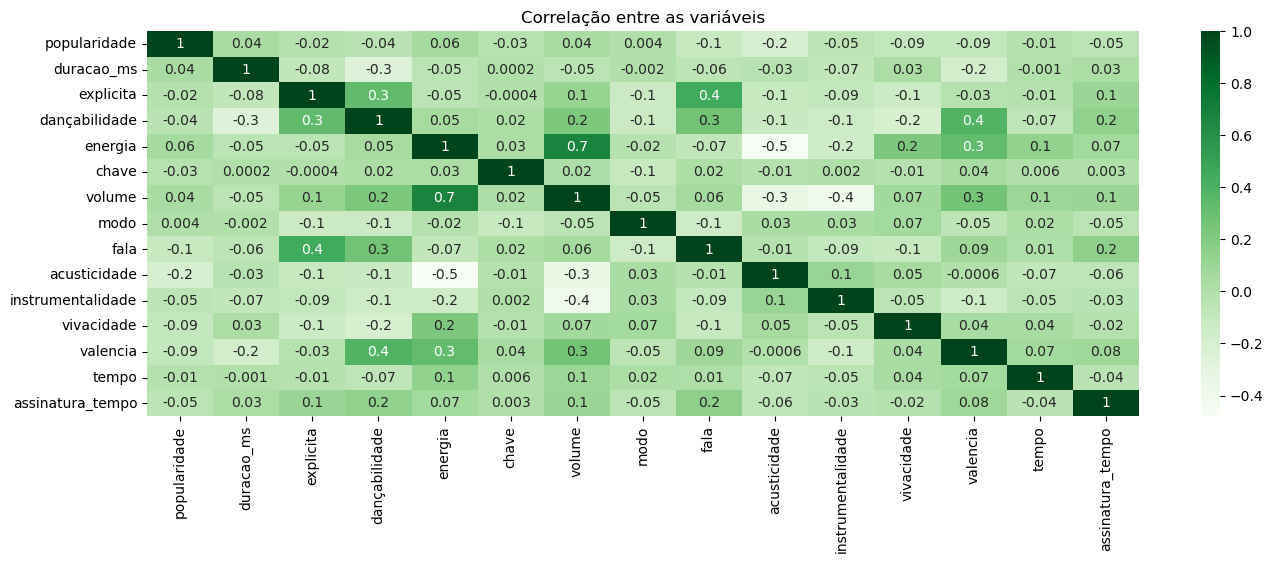

In [62]:
plt.figure(figsize=(16, 5))
sns.heatmap(df_corr, annot=True, fmt=".1g", cmap="Greens")
plt.title("Correlação entre as variáveis")
plt.show()

#### Correlação entre acusticidade e energia

Primeiro extraímos os valores de x e y do DataFrame df_musicas. Em seguida, usamos a função np.polyfit() para calcular os coeficientes da linha linear que melhor se ajustam aos pontos de dados. Em seguida, criamos uma função de linha usando np.poly1d(). Por fim, usamos plt.plot() para traçar a linha usando os valores de x e a função de linha.

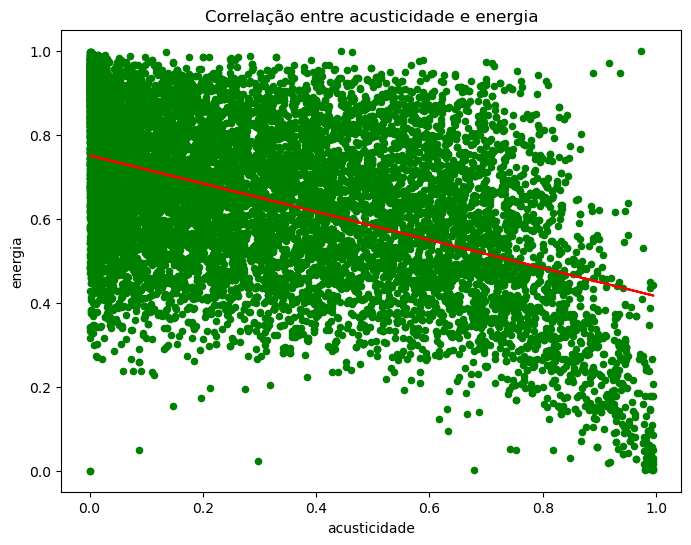

In [63]:
df_musicas.plot(kind='scatter', x='acusticidade', y='energia', figsize=(8, 6), c='green')

# Adicionando linha linear
x = df_musicas['acusticidade']
y = df_musicas['energia']
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.plot(x, line(x), color='red')
plt.title("Correlação entre acusticidade e energia")
plt.show()

#### Correlação entre energia e volume

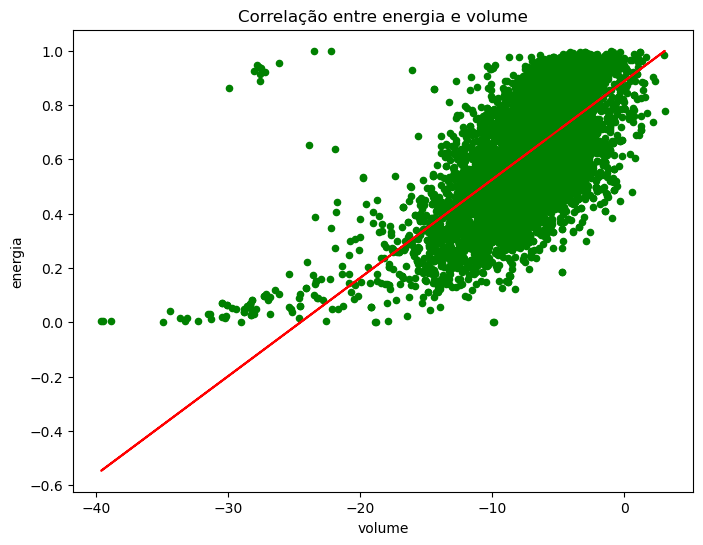

In [64]:
df_musicas.plot(kind='scatter', x='volume', y='energia', figsize=(8, 6), c='green')

# Adicionando linha linear
x = df_musicas['volume']
y = df_musicas['energia']
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.plot(x, line(x), color='red')
plt.title("Correlação entre energia e volume")
plt.show()

# Dataframe dos Usuários

## Juntando os arquivos dos dataframes

In [65]:
diretorio = "./DataFrames/Usuários"
arquivos = [arquivo for arquivo in os.listdir(diretorio) if not arquivo.startswith('.')] #Ignora arquivos escondidos

df_usuarios = pd.DataFrame()

for arquivo in arquivos:
    data_atual = pd.read_csv(diretorio+"/"+arquivo)
    data_atual['usuário'] = arquivo[:-4]
    df_usuarios = pd.concat([df_usuarios, data_atual])

In [66]:
df_usuarios

track_id                         track_name  \
0   4sX4O9mgw76aWhehf1eSRD                               Gone   
1   2MfOcbtgz2yTsiznFmVZUN                               Halo   
2   5Z9KJZvQzH6PFmb8SNkxuk  INDUSTRY BABY (feat. Jack Harlow)   
3   2Z8WuEywRWYTKe1NybPQEW                               Ride   
4   0WSa1sucoNRcEeULlZVQXj              Can You Feel My Heart   
..                     ...                                ...   
15  4uUG5RXrOk84mYEfFvj3cK                    I'm Good (Blue)   
16  3BKD1PwArikchz2Zrlp1qi                 Baby Don't Hurt Me   
17  0TDLuuLlV54CkRRUOahJb4               Titanium (feat. Sia)   
18  3P5h94RH9LOBwD8OF84M0u          Memories (feat. Kid Cudi)   
19  3mQOoBONOh6vnP51eMgWnP            Sexy Bitch (feat. Akon)   

             artist_name                                      artist_genres  \
0           Jack Johnson                                     ['neo mellow']   
1                Beyoncé                                     ['pop', 'r&b']   
2            Jack Harlow  ['deep underground hip hop', 'kentucky hip hop...   
3      Twenty One Pilots       ['modern rock', 'pop', 'pov: indie', 'rock']   
4   Bring Me The Horizon  ['melodic metalcore', 'metalcore', 'modern roc...   
..                   ...                                                ...   
15          David Guetta  ['big room', 'dance pop', 'edm', 'pop', 'pop d...   
16          David Guetta  ['big room', 'dance pop', 'edm', 'pop', 'pop d...   
17          David Guetta  ['big room', 'dance pop', 'edm', 'pop', 'pop d...   
18          David Guetta  ['big room', 'dance pop', 'edm', 'pop', 'pop d...   
19          David Guetta  ['big room', 'dance pop', 'edm', 'pop', 'pop d...   

                                 album_name               artist_id  \
0                                 On And On  3GBPw9NK25X1Wt2OUvOwY3   
1                       I AM...SASHA FIERCE  6vWDO969PvNqNYHIOW5v0m   
2                                   MONTERO  2LIk90788K0zvyj2JJVwkJ   
3                                Blurryface  3YQKmKGau1PzlVlkL1iodx   
4            Sempiternal (Expanded Edition)  1Ffb6ejR6Fe5IamqA5oRUF   
..                                      ...                     ...   
15                          I'm Good (Blue)  1Cs0zKBU1kc0i8ypK3B9ai   
16                       Baby Don't Hurt Me  1Cs0zKBU1kc0i8ypK3B9ai   
17  Nothing but the Beat (Ultimate Edition)  1Cs0zKBU1kc0i8ypK3B9ai   
18                            One More Love  1Cs0zKBU1kc0i8ypK3B9ai   
19                            One More Love  1Cs0zKBU1kc0i8ypK3B9ai   

    popularity  duration_ms  explicit  danceability  ...  mode  speechiness  \
0           68       130013     False         0.816  ...     0       0.0471   
1           70       261640     False         0.508  ...     0       0.0628   
2           81       212352      True         0.741  ...     0       0.0672   
3           84       214506     False         0.645  ...     1       0.0393   
4           81       228146      True         0.150  ...     0       0.0595   
..         ...          ...       ...           ...  ...   ...          ...   
15          94       175238      True         0.561  ...     0       0.0343   
16          92       140017     False         0.602  ...     1       0.0308   
17          83       245040     False         0.604  ...     0       0.1030   
18          67       210093     False         0.561  ...     1       0.3430   
19          68       195853      True         0.813  ...     0       0.0486   

    acousticness  instrumentalness  liveness  valence    tempo  \
0        0.83200          0.001040    0.1190    0.756   97.027   
1        0.27200          0.000000    0.0563    0.472   79.983   
2        0.02210          0.000000    0.0476    0.892  150.087   
3        0.00835          0.000000    0.1130    0.566   74.989   
4        0.00201          0.194000    0.3870    0.354  170.527   
..           ...               ...       ...      ...      ...   
15       0.00383        

## Análise exploratória de dados

### Informações sobre as colunas

In [67]:
df_usuarios.shape

(100, 23)

In [68]:
df_usuarios.columns

Index(['track_id', 'track_name', 'artist_name', 'artist_genres', 'album_name',
       'artist_id', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duracao_min', 'usuário'],
      dtype='object')

In [69]:
df_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          100 non-null    object 
 1   track_name        100 non-null    object 
 2   artist_name       100 non-null    object 
 3   artist_genres     100 non-null    object 
 4   album_name        100 non-null    object 
 5   artist_id         100 non-null    object 
 6   popularity        100 non-null    int64  
 7   duration_ms       100 non-null    int64  
 8   explicit          100 non-null    bool   
 9   danceability      100 non-null    float64
 10  energy            100 non-null    float64
 11  key               100 non-null    int64  
 12  loudness          100 non-null    float64
 13  mode              100 non-null    int64  
 14  speechiness       100 non-null    float64
 15  acousticness      100 non-null    float64
 16  instrumentalness  100 non-null    float64
 17

In [70]:
df_usuarios.dtypes

track_id             object
track_name           object
artist_name          object
artist_genres        object
album_name           object
artist_id            object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
duracao_min          object
usuário              object
dtype: object

In [71]:
df_usuarios.dtypes.value_counts()

float64    9
object     8
int64      5
bool       1
dtype: int64

In [72]:
df_usuarios.describe()

popularity   duration_ms  danceability      energy         key  \
count  100.000000     100.00000    100.000000  100.000000  100.000000   
mean    78.270000  222545.57000      0.611010    0.732650    4.790000   
std      8.175913   65071.64083      0.160759    0.169041    3.856766   
min     52.000000  120405.00000      0.150000    0.262000    0.000000   
25%     72.000000  177615.00000      0.522250    0.652000    1.000000   
50%     80.000000  215173.00000      0.604000    0.754500    4.000000   
75%     84.000000  241546.25000      0.742500    0.859250    8.000000   
max     94.000000  515386.00000      0.912000    0.978000   11.000000   

        loudness        mode  speechiness  acousticness  instrumentalness  \
count  100.00000  100.000000   100.000000    100.000000        100.000000   
mean    -5.66653    0.470000     0.076556      0.205887          0.009906   
std      2.31805    0.501614     0.068823      0.237205          0.051178   
min    -15.73000    0.000000     0.023200      0.000185          0.000000   
25%     -6.67225    0.000000     0.039275      0.014845          0.000000   
50%     -5.24650    0.000000     0.050550      0.102500          0.000000   
75%     -4.03200    1.000000     0.079075      0.320750          0.000061   
max     -2.25600    1.000000     0.378000      0.945000          0.431000   

         liveness     valence       tempo  time_signature  
count  100.000000  100.000000  100.000000      100.000000  
mean     0.232562    0.516082  124.380710        3.990000  
std      0.238720    0.236208   27.096284        0.224508  
min      0.028000    0.095100   74.989000        3.000000  
25%      0.087225    0.308500  105.165500        4.000000  
50%      0.120500    0.544500  125.491500        4.000000  
75%      0.261250    0.658250  137.993250        4.000000  
max      0.967000    0.970000  191.385000        5.000000

### Verificando se existem valores nulos no dataframe

In [73]:
df_usuarios.isnull().sum()

track_id            0
track_name          0
artist_name         0
artist_genres       0
album_name          0
artist_id           0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duracao_min         0
usuário             0
dtype: int64

### Verificando se existem linhas duplicadas no dataframe

In [74]:
df_usuarios.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
15    False
16    False
17     True
18     True
19    False
Length: 100, dtype: bool

In [75]:
df_usuarios.duplicated().sum()

4

## Tratando o dataframe

### Excluindo a coluna "Unnamed: 0"

In [76]:
#df_usuarios = df_usuarios.drop("Unnamed: 0", axis=1)
#df_usuarios.head()

### Renomeando as colunas para português

In [77]:
df_usuarios.columns

Index(['track_id', 'track_name', 'artist_name', 'artist_genres', 'album_name',
       'artist_id', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duracao_min', 'usuário'],
      dtype='object')

In [78]:
df_usuarios.rename(columns={'track_id': 'id_da_faixa',
                        'track_name': 'nome_da_faixa',
                        'artist_name': 'nome_do_artista',
                        'artist_genres': 'generos_do_artista',
                        'album_name': 'nome_do_album',
                        'artist_id': 'id_do_artista',
                        'popularity': 'popularidade',
                        'duration_ms': 'duracao_ms',
                        'explicit': 'explicita',
                        'danceability': 'dançabilidade',
                        'energy': 'energia',
                        'key': 'chave',
                        'loudness': 'volume',
                        'mode': 'modo',
                        'speechiness': 'fala',
                        'acousticness': 'acusticidade',
                        'instrumentalness': 'instrumentalidade',
                        'liveness': 'vivacidade',
                        'valence': 'valencia',
                        'tempo': 'tempo',
                        'time_signature': 'assinatura_tempo'}, inplace=True)


In [79]:
df_usuarios.head()

id_da_faixa                      nome_da_faixa  \
0  4sX4O9mgw76aWhehf1eSRD                               Gone   
1  2MfOcbtgz2yTsiznFmVZUN                               Halo   
2  5Z9KJZvQzH6PFmb8SNkxuk  INDUSTRY BABY (feat. Jack Harlow)   
3  2Z8WuEywRWYTKe1NybPQEW                               Ride   
4  0WSa1sucoNRcEeULlZVQXj              Can You Feel My Heart   

        nome_do_artista                                 generos_do_artista  \
0          Jack Johnson                                     ['neo mellow']   
1               Beyoncé                                     ['pop', 'r&b']   
2           Jack Harlow  ['deep underground hip hop', 'kentucky hip hop...   
3     Twenty One Pilots       ['modern rock', 'pop', 'pov: indie', 'rock']   
4  Bring Me The Horizon  ['melodic metalcore', 'metalcore', 'modern roc...   

                    nome_do_album           id_do_artista  popularidade  \
0                       On And On  3GBPw9NK25X1Wt2OUvOwY3            68   
1             I AM...SASHA FIERCE  6vWDO969PvNqNYHIOW5v0m            70   
2                         MONTERO  2LIk90788K0zvyj2JJVwkJ            81   
3                      Blurryface  3YQKmKGau1PzlVlkL1iodx            84   
4  Sempiternal (Expanded Edition)  1Ffb6ejR6Fe5IamqA5oRUF            81   

   duracao_ms  explicita  dançabilidade  ...  modo    fala  acusticidade  \
0      130013      False          0.816  ...     0  0.0471       0.83200   
1      261640      False          0.508  ...     0  0.0628       0.27200   
2      212352       True          0.741  ...     0  0.0672       0.02210   
3      214506      False          0.645  ...     1  0.0393       0.00835   
4      228146       True          0.150  ...     0  0.0595       0.00201   

   instrumentalidade  vivacidade  valencia    tempo  assinatura_tempo  \
0            0.00104      0.1190     0.756   97.027                 4   
1            0.00000      0.0563     0.472   79.983                 4   
2            0.00000      0.0476     0.892  150.087                 4   
3            0.00000      0.1130     0.566   74.989                 4   
4            0.19400      0.3870     0.354  170.527                 5   

   duracao_min  usuário  
0        02:10  antonio  
1        04:21  antonio  
2        03:32  antonio  
3        03:34  antonio  
4        03:48  antonio  

[5 rows x 23 columns]

### Mesclando os dataframes

In [80]:
df_final = pd.merge(df_usuarios.drop(columns=['nome_do_artista', 'generos_do_artista', 'nome_da_faixa']), df_musicas, on='id_da_faixa')
df_final

id_da_faixa      nome_do_album_x         id_do_artista_x  \
0    4sX4O9mgw76aWhehf1eSRD            On And On  3GBPw9NK25X1Wt2OUvOwY3   
1    4sX4O9mgw76aWhehf1eSRD            On And On  3GBPw9NK25X1Wt2OUvOwY3   
2    2MfOcbtgz2yTsiznFmVZUN  I AM...SASHA FIERCE  6vWDO969PvNqNYHIOW5v0m   
3    5Z9KJZvQzH6PFmb8SNkxuk              MONTERO  2LIk90788K0zvyj2JJVwkJ   
4    5Z9KJZvQzH6PFmb8SNkxuk              MONTERO  2LIk90788K0zvyj2JJVwkJ   
..                      ...                  ...                     ...   
131  4uUG5RXrOk84mYEfFvj3cK      I'm Good (Blue)  1Cs0zKBU1kc0i8ypK3B9ai   
132  3BKD1PwArikchz2Zrlp1qi   Baby Don't Hurt Me  1Cs0zKBU1kc0i8ypK3B9ai   
133  3BKD1PwArikchz2Zrlp1qi   Baby Don't Hurt Me  1Cs0zKBU1kc0i8ypK3B9ai   
134  3BKD1PwArikchz2Zrlp1qi   Baby Don't Hurt Me  1Cs0zKBU1kc0i8ypK3B9ai   
135  3mQOoBONOh6vnP51eMgWnP        One More Love  1Cs0zKBU1kc0i8ypK3B9ai   

     popularidade_x  duracao_ms_x  explicita_x  dançabilidade_x  energia_x  \
0                68        130013        False            0.816      0.338   
1                68        130013        False            0.816      0.338   
2                70        261640        False            0.508      0.720   
3                81        212352         True            0.741      0.691   
4                81        212352         True            0.741      0.691   
..              ...           ...          ...              ...        ...   
131              94        175238         True            0.561      0.965   
132              92        140017        False            0.602      0.910   
133              92        140017        False            0.602      0.910   
134              92        140017        False            0.602      0.910   
135              68        195853         True            0.813      0.627   

     chave_x  volume_x  ...  volume_y  modo_y  fala_y  acusticidade_y  \
0         11   -11.989  ...   -11.989       0  0.0471         0.83200   
1         11   -11.989  ...   -11.989       0  0.0471         0.83200   
2         11    -5.908  ...    -5.908       0  0.0628         0.27200   
3         10    -7.395  ...    -7.395       0  0.0672         0.02210   
4         10    -7.395  ...    -7.395       0  0.0672         0.02210   
..       ...       ...  ...       ...     ...     ...             ...   
131        7    -3.673  ...    -3.673       0  0.0343         0.00383   
132        7    -3.404  ...    -3.404       1  0.0308         0.00126   
133        7    -3.404  ...    -3.404       1  0.0308         0.00126   
134        7    -3.404  ...    -3.404       1  0.0308         0.00126   
135       11    -5.018  ...    -5.018       0  0.0486         0.07710   

     instrumentalidade_y  vivacidade_y  valencia_y  tempo_y  \
0               0.001040        0.1190       0.756   97.027   
1               0.001040        0.1190       0.756   97.027   
2               0.000000        0.0563       0.472   79.983   
3               0.000000        0.0476       0.892  150.087   
4               0.000000        0.0476       0.892  150.087   
..                   ...           ...         ...      ...   
131             0.000007        0.3710       0.304  128.040   
132             0.000174        0.1200       0.228  127.944   
133             0.000174        0.1200       0.228  127.944   
134             0.000174        0.1200       0.228  127.944   
135             0.000616        0.1310       0.801  130.011   

    assinatura_tempo_y duracao_min_y  
0                    4         02:10  
1                    4         02:10  
2                    4         04:21  
3                    4         03:32  
4                    4         03:32  
..                 ...           ...  
131                  4         02:55  
132                  4         02:20  
133                  4         02:20  
134                  4         02:20  
135                  4         03:15  

[136 rows x 41 columns]

In [81]:
df_final = df_final.drop_duplicates(subset='id_da_faixa', keep='first')
df_final

id_da_faixa                          nome_do_album_x  \
0    4sX4O9mgw76aWhehf1eSRD                                On And On   
2    2MfOcbtgz2yTsiznFmVZUN                      I AM...SASHA FIERCE   
3    5Z9KJZvQzH6PFmb8SNkxuk                                  MONTERO   
5    2Z8WuEywRWYTKe1NybPQEW                               Blurryface   
7    0WSa1sucoNRcEeULlZVQXj           Sempiternal (Expanded Edition)   
..                      ...                                      ...   
126  0TDLuuLlV54CkRRUOahJb4  Nothing but the Beat (Ultimate Edition)   
128  6QFCMUUq1T2Vf5sFUXcuQ7                                  Believe   
130  4uUG5RXrOk84mYEfFvj3cK                          I'm Good (Blue)   
132  3BKD1PwArikchz2Zrlp1qi                       Baby Don't Hurt Me   
135  3mQOoBONOh6vnP51eMgWnP                            One More Love   

            id_do_artista_x  popularidade_x  duracao_ms_x  explicita_x  \
0    3GBPw9NK25X1Wt2OUvOwY3              68        130013        False   
2    6vWDO969PvNqNYHIOW5v0m              70        261640        False   
3    2LIk90788K0zvyj2JJVwkJ              81        212352         True   
5    3YQKmKGau1PzlVlkL1iodx              84        214506        False   
7    1Ffb6ejR6Fe5IamqA5oRUF              81        228146         True   
..                      ...             ...           ...          ...   
126  1Cs0zKBU1kc0i8ypK3B9ai              83        245040        False   
128  1uNFoZAHBGtllmzznpCI3s              76        227986        False   
130  1Cs0zKBU1kc0i8ypK3B9ai              94        175238         True   
132  1Cs0zKBU1kc0i8ypK3B9ai              92        140017        False   
135  1Cs0zKBU1kc0i8ypK3B9ai              68        195853         True   

     dançabilidade_x  energia_x  chave_x  volume_x  ...  volume_y  modo_y  \
0              0.816      0.338       11   -11.989  ...   -11.989       0   
2              0.508      0.720       11    -5.908  ...    -5.908       0   
3              0.741      0.691       10    -7.395  ...    -7.395       0   
5              0.645      0.713        6    -5.355  ...    -5.355       1   
7              0.150      0.859        4    -2.827  ...    -2.827       0   
..               ...        ...      ...       ...  ...       ...     ...   
126            0.604      0.787        0    -3.674  ...    -3.674       0   
128            0.601      0.843        0    -4.870  ...    -4.870       1   
130            0.561      0.965        7    -3.673  ...    -3.673       0   
132            0.602      0.910        7    -3.404  ...    -3.404       1   
135            0.813      0.627       11    -5.018  ...    -5.018       0   

     fala_y  acusticidade_y  instrumentalidade_y  vivacidade_y  valencia_y  \
0    0.0471        0.832000             0.001040        0.1190       0.756   
2    0.0628        0.272000             0.000000        0.0563       0.472   
3    0.0672        0.022100             0.000000        0.0476       0.892   
5    0.0393        0.008350             0.000000        0.1130       0.566   
7    0.0595        0.002010             0.194000        0.3870       0.354   
..      ...             ...                  ...           ...         ...   
126  0.1030        0.067900             0.150000        0.1270       0.301   
128  0.0593        0.000704             0.000053        0.0681       0.534   
130  0.0343        0.003830             0.000007        0.3710       0.304   
132  0.0308        0.001260             0.000174        0.1200       0.228   
135  0.0486        0.077100             0.000616        0.1310       0.801   

     tempo_y assinatura_tempo_y duracao_min_y  
0     97.027                  4         02:10  
2     79.983                  4         04:21  
3    150.087                  4         03:32  
5     74.989                  4         03:34  
7    170.527                  5         03:48  
..       ...                ...           ...  
126  126.062                  4         04:05  
128  128.002    

## Primeiras análises

In [82]:
df_usuarios['id_da_faixa'].duplicated().value_counts()

False    87
True     13
Name: id_da_faixa, dtype: int64

In [83]:
df_usuarios['id_da_faixa'].value_counts() > 1

7qiZfU4dY1lWllzX7mPBI3     True
3ScJy88F8KqGDfWu8XJhHx     True
1QV6tiMFM6fSOKOGLMHYYg     True
7FrJV8tydWEv1Mxu2mIQrm     True
5sICkBXVmaCQk5aISGR3x1     True
                          ...  
7EQvdUJqZ2i7SWvSB2VqGA    False
2MuWTIM3b0YEAskbeeFE1i    False
0ct6r3EGTcMLPtrXHDvVjc    False
6tRneEcItwpSxBtqgem5Dr    False
3mQOoBONOh6vnP51eMgWnP    False
Name: id_da_faixa, Length: 87, dtype: bool

In [84]:
df_usuarios.loc[df_usuarios['id_da_faixa'] == '6EtKlIQmGPB9SX8UjDJG5s']

Empty DataFrame
Columns: [id_da_faixa, nome_da_faixa, nome_do_artista, generos_do_artista, nome_do_album, id_do_artista, popularidade, duracao_ms, explicita, dançabilidade, energia, chave, volume, modo, fala, acusticidade, instrumentalidade, vivacidade, valencia, tempo, assinatura_tempo, duracao_min, usuário]
Index: []

[0 rows x 23 columns]

In [85]:
df_usuarios['generos_do_artista'].value_counts()

['pop', 'uk pop']                                                                                               9
['big room', 'dance pop', 'edm', 'pop', 'pop dance']                                                            7
['agronejo', 'arrocha', 'sertanejo', 'sertanejo universitario']                                                 4
['hard rock', 'metal', 'old school thrash', 'rock', 'thrash metal']                                             4
['agronejo']                                                                                                    3
['pop']                                                                                                         3
['alternative metal', 'nu metal', 'post-grunge', 'rap metal', 'rock']                                           3
['g funk', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'west coast rap']                                       3
['dutch edm', 'edm', 'pop', 'pop dance', 'progressive house']                           

In [86]:
df_usuarios.iloc[60:80]

id_da_faixa                                      nome_da_faixa  \
0   49iPCmLYg3SS8r2MXcbR1N                                             Lonely   
1   1QV6tiMFM6fSOKOGLMHYYg                                         Poker Face   
2   3e7sxremeOE3wTySiOhGiP            Dusk Till Dawn (feat. Sia) - Radio Edit   
3   3spdoTYpuCpmq19tuD0bOe                                             My Way   
4   2bL2gyO6kBdLkNSkxXNh6x                                            Animals   
5   3JA9Jsuxr4xgHXEawAdCp4                              Just Can’t Get Enough   
6   3ScJy88F8KqGDfWu8XJhHx           If I Lose Myself - Alesso vs OneRepublic   
7   4VrWlk8IQxevMvERoX08iC                                         Chandelier   
8   3FNy4yzOhHhFBeA5p4ofoq              Young, Wild & Free (feat. Bruno Mars)   
9   2tpWsVSb9UEmDRxAl1zhX1                                     Counting Stars   
10  7Feaw9WAEREY0DUOSXJLOM  Summer Days (feat. Macklemore & Patrick Stump ...   
11  3ebXMykcMXOcLeJ9xZ17XH                                Scared to Be Lonely   
12  2yPoXCs7BSIUrucMdK5PzV                                           Umbrella   
13  10xV5l9nhLvFpR8mqzs0bL                                               Numb   
14  60a0Rd6pjrkxjPbaKzXjfq                                         In the End   
15  0H8CBal2Dcu5Yc001VotZN                                        Dona de mim   
16  54ipXppHLA8U4yqpOFTUhr                                              Bones   
17  7FrJV8tydWEv1Mxu2mIQrm                                          Beautiful   
18  37LNNQNbL1YLyutBG6aWRx                                          Rescue Me   
19  1NpW5kyvO4XrNJ3rnfcNy3                              Wild Ones (feat. Sia)   

    nome_do_artista                                 generos_do_artista  \
0                RM                                          ['k-rap']   
1         Lady Gaga                    ['art pop', 'dance pop', 'pop']   
2              ZAYN                                  ['pop', 'uk pop']   
3     Frank Sinatra    ['adult standards', 'easy listening', 'lounge']   
4          Maroon 5                                            ['pop']   
5   Black Eyed Peas                    ['dance pop', 'pop', 'pop rap']   
6            Alesso  ['dance pop', 'edm', 'pop', 'pop dance', 'prog...   
7               Sia      ['australian dance', 'australian pop', 'pop']   
8        Snoop Dogg  ['g funk', 'gangster rap', 'hip hop', 'pop rap...   
9       OneRepublic                              ['piano rock', 'pop']   
10    Martin Garrix  ['dutch edm', 'edm', 'pop', 'pop dance', 'prog...   
11    Martin Garrix  ['dutch edm', 'edm', 'pop', 'pop dance', 'prog...   
12          Rihanna     ['barbadian pop', 'pop', 'urban contemporary']   
13       Marshmello  ['brostep', 'edm', 'pop', 'progressive electro...   
14      Linkin Park  ['alternative metal', 'nu metal', 'post-grunge...   
15              IZA  ['afrofuturismo brasileiro', 'pop nacional', '...   
16  Imagine Dragons                     ['modern rock', 'pop', 'rock']   
17       Snoop Dogg  ['g funk', 'gangster rap', 'hip hop', 'pop rap...   
18      OneRepublic                              ['piano rock', 'pop']   
19         Flo Rida   ['dance pop', 'miami hip hop', 'pop', 'pop rap']   

                                        nome_do_album           id_do_artista  \
0                                              Indigo  2auC28zjQyVTsiZKNgPRGs   
1                                            The Fame  1HY2Jd0NmPuamShAr6KMms   
2                                        Icarus Falls  5ZsFI1h6hIdQRw2ti0hz81   
3                           My Way (Expanded Edition)  1Mxqyy3pSjf8kZZL4QVxS0   
4                                                   V  04gDigrS5kc9YWfZHwBETP   
5                                       The Beginning  1yxSLGMDHlW21z4YXirZDS   
6                                              Native  4AVFqumd2ogHFlRbKIjp1t   
7                                  1000 Forms Of Fear  5WUlDfRSoLAfcVSX1WnrxN   
8               Young, Wild &

In [88]:
df_mateus = df_usuarios.loc[df_usuarios['usuário'] == 'mateus']

In [89]:
df_mateus.columns

Index(['id_da_faixa', 'nome_da_faixa', 'nome_do_artista', 'generos_do_artista',
       'nome_do_album', 'id_do_artista', 'popularidade', 'duracao_ms',
       'explicita', 'dançabilidade', 'energia', 'chave', 'volume', 'modo',
       'fala', 'acusticidade', 'instrumentalidade', 'vivacidade', 'valencia',
       'tempo', 'assinatura_tempo', 'duracao_min', 'usuário'],
      dtype='object')

In [90]:
from sklearn.metrics.pairwise import cosine_similarity


df_mateus = df_mateus.drop(columns=['usuário', 'id_da_faixa','nome_da_faixa',	'nome_do_artista',	'generos_do_artista',	'nome_do_album','id_do_artista','explicita', 'duracao_min', 'popularidade'])  # Substitua pelas colunas desnecessárias
df_musica = df_musicas.drop(columns=['id_da_faixa','nome_da_faixa',	'nome_do_artista',	'generos_do_artista',	'nome_do_album','id_do_artista','explicita', 'duracao_min', 'popularidade'])

similaridade = cosine_similarity(df_musica.values, df_mateus.values)


indices_recomendadas = similaridade.argsort(axis=0)[-10:, 0].flatten()


musicas_recomendadas = df_musicas.iloc[indices_recomendadas]


display(musicas_recomendadas)

ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required by check_pairwise_arrays.

In [ ]:
df = pd.read_excel('antonio2.xlsx')

In [91]:
df_final = pd.merge(df, df_musicas, on='nome_da_faixa')
df_final = df_final.drop_duplicates(subset='nome_da_faixa', keep='first')

df_final = df_final[['id_da_faixa', 'nome_da_faixa', 'nome_do_artista', 'generos_do_artista',
       'nome_do_album', 'id_do_artista', 'popularidade', 'duracao_ms',
       'explicita', 'dançabilidade', 'energia', 'chave', 'volume', 'modo',
       'fala', 'acusticidade', 'instrumentalidade', 'vivacidade', 'valencia',
       'tempo', 'assinatura_tempo', 'duracao_min']]


NameError: name 'df' is not defined

In [ ]:
if df_final.id_da_faixa.count() <= 20:
    artista_mais_ouvido = df_final['nome_do_artista'].value_counts().idxmax()
    musicas_artista_mais_ouvido = df_musicas[df_musicas['nome_do_artista'] == artista_mais_ouvido]
    df_final = df_final.append(musicas_artista_mais_ouvido, ignore_index=True)

df_final = df_final.head(20)

df_final.rename(columns={'id_da_faixa': 'track_id',
                        'nome_da_faixa': 'track_name',
                        'nome_do_artista': 'artist_name',
                        'generos_do_artista': 'artist_genres',
                        'nome_do_album': 'album_name',
                        'id_do_artista': 'artist_id',
                        'popularidade': 'popularity',
                        'duracao_ms': 'duration_ms',
                        'explicita': 'explicit',
                        'dançabilidade': 'danceability',
                        'energia': 'energy',
                        'chave': 'key',
                        'volume': 'loudness',
                        'modo': 'mode',
                        'fala': 'speechiness',
                        'acusticidade': 'acousticness',
                        'instrumentalidade': 'instrumentalness',
                        'vivacidade': 'liveness',
                        'valencia': 'valence',
                        'tempo': 'tempo',
                        'assinatura_tempo': 'time_signature'}, inplace=True)


In [ ]:
df_final.to_csv('./DataFrames/Usuários/antonio2.csv', index=False)

In [ ]:
df = pd.read_csv('./DataFrames/Usuários/mateus.csv')
df